<a href="https://colab.research.google.com/github/douyang/echonet-function-evaluation/blob/master/Calculations_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload Data

In [2]:
from google.colab import files
files.upload()

Saving video-1594419586.mp4 to video-1594419586.mp4


{'video-1594419586.mp4': b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x07\x1fmoov\x00\x00\x00lmvhd\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\xe8\x00\x00\x0bT\x00\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x06Itrak\x00\x00\x00\\tkhd\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x0bT\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\xe0\x00\x00\x00\xe0\x00\x00\x00\x00\x00$edts\x00\x00\x00\x1celst\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x0bT\x00\x00\x04\x00\x00\x01\x00\x00\x00\x00\x

# Mount Drive

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

KeyboardInterrupt: ignored

# Generating Image Samples

In [3]:
from google.colab.patches import cv2_imshow

In [4]:
!rm -rf /content/frames
!rm -rf /content/output

In [5]:
!mkdir /content/frames
!mkdir /content/output

In [6]:
import cv2

videopath = "/content/video-1594419586.mp4"

cap= cv2.VideoCapture(videopath)

i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('/content/frames/frame'+str(i)+'.png',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()


# Insert mask code

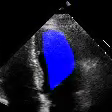

-1

In [7]:
import numpy as np
import cv2
from PIL import Image

image = "/content/frames/frame24.png"
# original = Image.open(test_image)

# width, height = original.size

image = cv2.imread(image)
h, w, c = image.shape

# Starting Coords
x1 = round(w/2)
y1 = 0

# Ending Coords
x2 = w
y2 = round(h/2)

# Crop
crop = image[y1:y2, x1:x2]
cv2_imshow(crop)

# Save Image
cv2.imwrite("/content/output/image.png", crop)

cv2.waitKey(0)

# Get all of the coordinates of the edge of the segmented mask

Number of points:  145


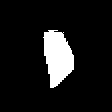

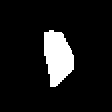

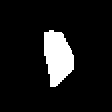

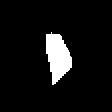

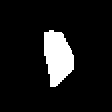

In [8]:
import cv2
import numpy as np

# read image
img = cv2.imread('/content/output/image.png')

# convert to hsv color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
kernel = np.ones((5,5),np.uint8)

# set lower and upper bounds on blue color
lower = (0,90,200)
upper = (150,255,255)

# threshold and invert so hexagon is white on black background
thresh = cv2.inRange(hsv, lower, upper);
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
erosion = cv2.erode(closing,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
# blur = cv2.GaussianBlur(closing,(5,5),0)

# get contours
result = np.zeros_like(img)
contours = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

points = []
# list contour points
for pt in contours:
    for i in pt:
      for coord in i:
        points.append(coord)

print("Number of points: ", len(points))
# show thresh and contour  
cv2_imshow(thresh)
cv2_imshow(opening)
cv2_imshow(closing)
cv2_imshow(erosion)
cv2_imshow(dilation)
# cv2_imshow(blur)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
for point in points:
  print(point)

[49 17]
[48 18]
[48 19]
[48 20]
[48 21]
[48 22]
[48 23]
[48 24]
[48 25]
[48 26]
[48 27]
[48 28]
[48 29]
[48 30]
[48 31]
[48 32]
[48 33]
[48 34]
[48 35]
[48 36]
[48 37]
[48 38]
[48 39]
[48 40]
[48 41]
[49 41]
[50 42]
[50 43]
[50 44]
[50 45]
[50 46]
[50 47]
[50 48]
[50 49]
[50 50]
[50 51]
[50 52]
[50 53]
[50 54]
[50 55]
[50 56]
[50 57]
[50 58]
[50 59]
[50 60]
[50 61]
[50 62]
[50 63]
[51 63]
[52 63]
[53 63]
[54 64]
[54 65]
[55 65]
[56 65]
[57 65]
[58 65]
[59 65]
[60 65]
[61 65]
[62 65]
[63 65]
[64 65]
[65 65]
[65 64]
[66 63]
[67 63]
[68 62]
[69 62]
[70 62]
[71 62]
[72 61]
[73 61]
[74 61]
[75 61]
[75 60]
[75 59]
[75 58]
[76 57]
[77 57]
[77 56]
[77 55]
[77 54]
[77 53]
[77 52]
[77 51]
[77 50]
[77 49]
[77 48]
[77 47]
[77 46]
[76 46]
[75 45]
[75 44]
[75 43]
[75 42]
[74 42]
[73 41]
[73 40]
[73 39]
[73 38]
[73 37]
[73 36]
[72 36]
[71 35]
[71 34]
[71 33]
[71 32]
[70 32]
[69 31]
[69 30]
[68 30]
[67 29]
[67 28]
[67 27]
[67 26]
[66 26]
[65 25]
[65 24]
[65 23]
[65 22]
[64 22]
[63 21]
[63 20]
[62 20]


# Finding maximum distance between points(Heuristic 1)

In [ ]:
import itertools, math

distance = 0
x1, x2, y1, y2 = 0, 0, 0, 0

for p1,p2 in itertools.combinations(points,2):
  latest_distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
  if latest_distance > distance:
    distance = latest_distance

    x1=p1[0]
    x2=p2[0]
    y1=p1[1]
    y2=p2[1]

print("Max distance: ", distance)
print(x1)
print(x2)
print(y1)
print(y2)


Max distance:  51.10772935672255
49
75
17
61


# Top 5 and Bottom 5 Analysis(Heuristic 2)

In [9]:
# Minimum and Maximum Y Coord
maxY = max(points, key = lambda point: point[1])
minY = min(points, key = lambda point: point[1])

# MinY and MaxY With the limits
minYWith5 = minY[1] + 5
maxYWithout5 = maxY[1] - 5

# Creating these arrays
minYWith5Arr = []
maxYWithout5Arr = []

# Finding these points
for point in points:
  if point[1] == minYWith5:
    minYWith5Arr.append(point)
  elif point[1] == maxYWithout5:
    maxYWithout5Arr.append(point)

# Average X Coordinates
averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)

# Creating these arrays
averageTopXArr = []
averageBottomXArr = []

# Finding these points
for point in points:
  if point[0] == averageTopX:
    averageTopXArr.append(point)
  elif point[0] == averageBottomX:
    averageBottomXArr.append(point)

# Sorting Arrs
averageTopXArr.sort(key=lambda point: point[1])
averageBottomXArr.sort(key=lambda point: point[1])
averageBottomXArr.reverse()

# Finding Min Top and Max Botpp,
TopCoord = averageTopXArr[0]
BottomCoord = averageBottomXArr[0]

print(TopCoord, BottomCoord)
x1, y1 = TopCoord
x2, y2 = BottomCoord

[54 32] [56 85]


# Calculate weighted average

In [10]:
import math

# parallel_dist = distance/21

weighted_avg = []

for n in range(1, 21, 1):
  x_perpendicular = (((n*x1)+(21-n)*(x2))/21)
  y_perpendicular = (((n*y1)+(21-n)*(y2))/21)
  weighted_avg.append([x_perpendicular, y_perpendicular])

print(weighted_avg)

[[55.904761904761905, 82.47619047619048], [55.80952380952381, 79.95238095238095], [55.714285714285715, 77.42857142857143], [55.61904761904762, 74.9047619047619], [55.523809523809526, 72.38095238095238], [55.42857142857143, 69.85714285714286], [55.333333333333336, 67.33333333333333], [55.23809523809524, 64.80952380952381], [55.142857142857146, 62.285714285714285], [55.04761904761905, 59.76190476190476], [54.95238095238095, 57.23809523809524], [54.857142857142854, 54.714285714285715], [54.76190476190476, 52.19047619047619], [54.666666666666664, 49.666666666666664], [54.57142857142857, 47.142857142857146], [54.476190476190474, 44.61904761904762], [54.38095238095238, 42.095238095238095], [54.285714285714285, 39.57142857142857], [54.19047619047619, 37.04761904761905], [54.095238095238095, 34.523809523809526]]


# Draw a line given slope and intercept coordinates

7.166666666666667


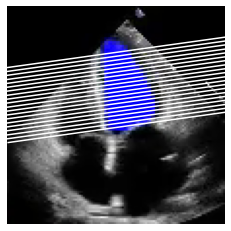

In [ ]:
import matplotlib.pyplot as plt
import random

image = Image.open("/content/output/image.png")

def find_second_point(slope, x0, y0):
    # this function returns a point which belongs to the line that has the slope 
    # inserted by the user and that intercepts the point (x0,y0) inserted by the user
    q = y0 - (slope*x0)  # calculate q
    new_x1 = x0 + random.randint(x0,x0+10)  
    new_y1 = (slope*new_x1) + q  
    new_x2 = x0 - random.randint(x0,x0+10)  
    new_y2 = (slope*new_x2) + q

    return new_x1, new_y1, new_x2, new_y2   

slope = (y2-y1)/(x2-x1)
print(slope)
perp_slope = -1/slope
for i in weighted_avg:
  x_intercept = i[0]
  y_intercept = i[1]

  new_x1, new_y1,new_x2, new_y2 = find_second_point(perp_slope , x_intercept, y_intercept)

  plt.plot((new_x2, new_x1),(new_y2, new_y1), c='w')

  plt.axis('off')
  plt.imshow(image)

plt.savefig('/content/output/lined.png', transparent=True, bbox_inches='tight', pad_inches = 0)

In [ ]:
import PIL
from PIL import Image

image = PIL.Image.open("/content/output/image.png")

width, height = image.size

basewidth = width
img = Image.open("/content/output/lined.png")

wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("/content/output/resized_image.png")

FileNotFoundError: ignored

# Create transparent crop

In [ ]:
import cv2
import numpy as np

image = cv2.imread('/content/output/resized_image.png', -1)

mask = np.zeros(image.shape, dtype=np.uint8)
roi_corners = np.array([points], dtype=np.int32)

channel_count = image.shape[2]  # i.e. 3 or 4 depending on your image
ignore_mask_color = (255,)*channel_count
cv2.fillPoly(mask, roi_corners, ignore_mask_color)

# apply the mask
masked_image = cv2.bitwise_and(image, mask)

# save the result
cv2.imwrite('/content/output/image_masked.png', masked_image)

True

# Combine both images

In [ ]:
from PIL import Image

import numpy as np

img = Image.open("/content/output/image_masked.png")

background = Image.open("/content/output/image.png")

background.paste(img, (0, 0), img)
background.save('/content/output/final.png',"PNG")

# Draw final max line

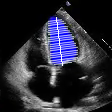

[221 182 175]


In [ ]:
image = cv2.imread('/content/output/final.png') 

height = image.shape[0]
width = image.shape[1]

cv2.line(image, (x1,y1), (x2,y2), (255, 255, 255), 1)
cv2_imshow(image)

print(image[x2, y2])

cv2.imwrite("/content/output/output.png", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Find All Mask White points

In [11]:
# Prechosen slope
slope = (y2-y1)/(x2-x1)
perp_slope = -1/slope

# Intercept slope
def calcExpectedIntercept(x, y, slope):
  return slope*x - y

# Partitions grid to two halvess
val = min(calcExpectedIntercept(x1, y1, slope), calcExpectedIntercept(x2, y2, slope))

# Points on lower half
lowerIntercept = []
# Points on higher half
higherIntercept = []

# Partitions points into two halves
for point in points:
  x, y = point
  x = int(x)
  y = int(y)
  expectedVal = calcExpectedIntercept(x, y, slope)

  if expectedVal > val:
    higherIntercept.append([x, y])
  else:
    lowerIntercept.append([x, y])

print(higherIntercept)
print(lowerIntercept)

# # Gets rid of initial points
if [x1, y1] in lowerIntercept:
  index = lowerIntercept.index([x1, y1])
  lowerIntercept = lowerIntercept[index:] + lowerIntercept[0:index]
  lowerIntercept = lowerIntercept[1:-1]
else:
  index = higherIntercept.index([x1, y1])
  higherIntercept = higherIntercept[index:] + higherIntercept[0:index]
  higherIntercept = higherIntercept[1:-1]

[[57, 85], [57, 84], [58, 83], [59, 83], [59, 82], [60, 81], [61, 81], [61, 80], [62, 79], [63, 79], [63, 78], [64, 77], [65, 77], [65, 76], [66, 75], [67, 75], [67, 74], [68, 73], [69, 73], [70, 72], [71, 71], [71, 70], [72, 69], [73, 69], [73, 68], [73, 67], [73, 66], [73, 65], [73, 64], [73, 63], [73, 62], [73, 61], [73, 60], [73, 59], [73, 58], [73, 57], [73, 56], [73, 55], [72, 54], [71, 53], [71, 52], [71, 51], [71, 50], [70, 49], [70, 48], [69, 47], [69, 46], [68, 45], [67, 44], [67, 43], [67, 42], [66, 42], [65, 41], [65, 40], [65, 39], [65, 38], [64, 38], [63, 37], [63, 36], [63, 35], [63, 34], [62, 33], [61, 32], [60, 32], [59, 32], [58, 32], [57, 32], [56, 32], [55, 32]]
[[49, 30], [49, 31], [48, 32], [47, 32], [46, 32], [45, 32], [44, 32], [44, 33], [44, 34], [44, 35], [44, 36], [44, 37], [44, 38], [44, 39], [44, 40], [44, 41], [44, 42], [44, 43], [44, 44], [44, 45], [44, 46], [44, 47], [44, 48], [44, 49], [44, 50], [44, 51], [44, 52], [44, 53], [44, 54], [44, 55], [45, 55]

# Simpson's Method

In [12]:
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Indexing
lowerIndex = 0
higherIndex = 0

# Make sure its from top to bottom direction
if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
  weighted_avg = weighted_avg[::-1]

# Make sure its from top to bottom direction
if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
    higherIntercept = higherIntercept[::-1]

# Make sure its from top to bottom direction
if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
    lowerIntercept = lowerIntercept[::-1]

higherInterceptAveragePoints = []
lowerInterceptAveragePoints = []

lowerIndex = 0
higherIndex = 0


for averagePoint in weighted_avg:
  condition = True
  while condition:
    point = higherIntercept[higherIndex]
    new_slope = getSlope(point, averagePoint)
    higherIndex += 1

    if new_slope>perp_slope:
      higherInterceptAveragePoints.append(point)
      condition = False

for averagePoint in weighted_avg:
  condition = True
  while condition:
    point = lowerIntercept[lowerIndex]
    new_slope = getSlope(point, averagePoint)
    lowerIndex += 1

    if new_slope<perp_slope:
      lowerInterceptAveragePoints.append(point)
      condition = False

print(lowerInterceptAveragePoints)
print(higherInterceptAveragePoints)

for i in range(len(lowerInterceptAveragePoints)):
  print(getSlope(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i]), lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])


[[44, 35], [44, 38], [44, 40], [44, 43], [44, 46], [44, 48], [44, 51], [44, 53], [46, 56], [46, 58], [46, 61], [46, 63], [48, 66], [48, 68], [48, 71], [48, 73], [50, 76], [50, 78], [50, 81], [50, 83]]
[[63, 35], [63, 37], [65, 40], [66, 42], [68, 45], [69, 47], [71, 50], [71, 52], [73, 55], [73, 57], [73, 60], [73, 62], [73, 65], [73, 67], [71, 70], [70, 72], [67, 75], [63, 78], [61, 80], [59, 83]]
-0.0 [44, 35] [63, 35]
-0.05263157894736842 [44, 38] [63, 37]
-0.0 [44, 40] [65, 40]
-0.045454545454545456 [44, 43] [66, 42]
-0.041666666666666664 [44, 46] [68, 45]
-0.04 [44, 48] [69, 47]
-0.037037037037037035 [44, 51] [71, 50]
-0.037037037037037035 [44, 53] [71, 52]
-0.037037037037037035 [46, 56] [73, 55]
-0.037037037037037035 [46, 58] [73, 57]
-0.037037037037037035 [46, 61] [73, 60]
-0.037037037037037035 [46, 63] [73, 62]
-0.04 [48, 66] [73, 65]
-0.04 [48, 68] [73, 67]
-0.043478260869565216 [48, 71] [71, 70]
-0.045454545454545456 [48, 73] [70, 72]
-0.058823529411764705 [50, 76] [67, 75]
-

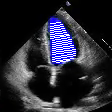

In [ ]:
image = cv2.imread('/content/output/image.png') 

height = image.shape[0]
width = image.shape[1]

for i in range(len(lowerInterceptAveragePoints)): 
  cv2.line(image, tuple(lowerInterceptAveragePoints[i]),  tuple(higherInterceptAveragePoints[i]), (255, 255, 255), 1)
cv2_imshow(image)
  
cv2.imwrite("/content/output/final.png", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Volume Calculation

In [13]:
distance = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

volume = 0

for i in range(len(lowerInterceptAveragePoints)):
  diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  radius = diameter/2
  diskVolume = math.pi * radius**2 * parallelSeperationDistance
  volume += diskVolume

print(volume)

20155.42239650248


# Prolate Ellipsoid Model (Single Ellipsoid Method)

In [21]:
long_axis_length = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

# Manual Area Calc
area = 0

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  diskArea = length * parallelSeperationDistance
  area += diskArea

volume = 0.85 * area**2 / length

print(volume)

119632.38784968079


# Prolate Ellipsoid Model (Biplane Area Length)

In [19]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Storing all perp lens
lengthArr = []

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  lengthArr.append(length)

# 3 diff heuristics
averageLength = sum(lengthArr)/len(lengthArr)
maxLength = max(lengthArr)
midLength = lengthArr[len(lengthArr)//2]

# Volume Calc
volume = math.pi/6 * midLength**2 * long_axis_length

print(volume)

20272.45516113132


# Bullet Method


In [18]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Mid Values
midIndex = len(lengthArr)//2
midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

# Volume Calc
volume = 5/6 * midLength**2 * long_axis_length

print(volume)

32264.61447502856


# Will become local file


In [24]:
import cv2
import numpy as np
import math

# Gets all the contours for certain image
def obtainContourPoints(path):
  # read image
  img = cv2.imread(path)

  # convert to hsv color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  kernel = np.ones((5,5),np.uint8)

  # set lower and upper bounds on blue color
  lower = (0,90,200)
  upper = (150,255,255)

  # threshold and invert so hexagon is white on black background
  thresh = cv2.inRange(hsv, lower, upper);
  opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
  closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
  erosion = cv2.erode(closing,kernel,iterations = 1)
  dilation = cv2.dilate(erosion,kernel,iterations = 1)
  # blur = cv2.GaussianBlur(closing,(5,5),0)

  # get contours
  result = np.zeros_like(img)
  contours = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]

  # Gets all contour points
  points = []
  for pt in contours:
      for i in pt:
        for coord in i:
          points.append(coord)
  
  # Resets
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  return points

# Finds points for main contour line
def getTopAndBottomCoords(points):
  # Minimum and Maximum Y Coord
  maxY = max(points, key = lambda point: point[1])
  minY = min(points, key = lambda point: point[1])

  # MinY and MaxY With the limits
  minYWith5 = minY[1] + 5
  maxYWithout5 = maxY[1] - 5

  # Creating these arrays
  minYWith5Arr = []
  maxYWithout5Arr = []

  # Finding these points
  for point in points:
    if point[1] == minYWith5:
      minYWith5Arr.append(point)
    elif point[1] == maxYWithout5:
      maxYWithout5Arr.append(point)

  # Average X Coordinates
  averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
  averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)

  # Creating these arrays
  averageTopXArr = []
  averageBottomXArr = []

  # Finding these points
  for point in points:
    if point[0] == averageTopX:
      averageTopXArr.append(point)
    elif point[0] == averageBottomX:
      averageBottomXArr.append(point)

  # Sorting Arrs
  averageTopXArr.sort(key=lambda point: point[1])
  averageBottomXArr.sort(key=lambda point: point[1])
  averageBottomXArr.reverse()

  # Finding Min Top and Max Botpp,
  TopCoord = averageTopXArr[0]
  BottomCoord = averageBottomXArr[0]

  x1, y1 = TopCoord
  x2, y2 = BottomCoord

  return (x1, y1, x2, y2)

# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2):
  weighted_avg = []

  for n in range(1, 21, 1):
    x_perpendicular = (((n*x1)+(21-n)*(x2))/21)
    y_perpendicular = (((n*y1)+(21-n)*(y2))/21)
    weighted_avg.append([x_perpendicular, y_perpendicular])

  return weighted_avg

# Intercept slope
def calcExpectedIntercept(x, y, slope):
  return slope*x - y

def splitPoints(x1, y1, x2, y2, points):
  # Prechosen slope
  slope = (y2-y1)/(x2-x1)
  perp_slope = -1/slope
  
  # Partitions grid to two halvess
  val = min(calcExpectedIntercept(x1, y1, slope), calcExpectedIntercept(x2, y2, slope))

  # Points on lower half
  lowerIntercept = []
  # Points on higher half
  higherIntercept = []

  # Partitions points into two halves
  for point in points:
    x, y = point
    x = int(x)
    y = int(y)
    expectedVal = calcExpectedIntercept(x, y, slope)

    if expectedVal > val:
      higherIntercept.append([x, y])
    else:
      lowerIntercept.append([x, y])

  # Gets rid of initial points
  if [x1, y1] in lowerIntercept:
    index = lowerIntercept.index([x1, y1])
    lowerIntercept = lowerIntercept[index:] + lowerIntercept[0:index]
    lowerIntercept = lowerIntercept[1:-1]
  else:
    index = higherIntercept.index([x1, y1])
    higherIntercept = higherIntercept[index:] + higherIntercept[0:index]
    higherIntercept = higherIntercept[1:-1]
  
  return (lowerIntercept, higherIntercept)

# Distance Between 2 Pointss
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Slope between points 
def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2):
  # Prechosen slope
  slope = (y2-y1)/(x2-x1)
  perp_slope = -1/slope

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  # Important Mask Points
  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  # Goes through mask for high side
  for averagePoint in weighted_avg:
    condition = True
    while condition:
      point = higherIntercept[higherIndex]
      new_slope = getSlope(point, averagePoint)
      higherIndex += 1

      if new_slope>perp_slope:
        higherInterceptAveragePoints.append(point)
        condition = False

  # Goes through mask for low side
  for averagePoint in weighted_avg:
    condition = True
    while condition:
      point = lowerIntercept[lowerIndex]
      new_slope = getSlope(point, averagePoint)
      lowerIndex += 1

      if new_slope<perp_slope:
        lowerInterceptAveragePoints.append(point)
        condition = False
  
  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)

def volumeSimpsonMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length and perp initialzation
  distance = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/21

  # Simpson Volume Methods
  volume = 0

  for i in range(len(lowerInterceptAveragePoints)):
    diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    radius = diameter/2
    diskVolume = math.pi * radius**2 * parallelSeperationDistance
    volume += diskVolume

  return volume

def volumeSingleEllipsoidMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length
  long_axis_length = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/21

  # Simpson Area Method
  area = 0

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    diskArea = length * parallelSeperationDistance
    area += diskArea

  # Volume Calc
  volume = 0.85 * area**2 / length

  return volume

def volumeBiplaneAreaMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Storing all perp lengths
  lengthArr = []

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    lengthArr.append(length)

  # 3 diff heuristics
  averageLength = sum(lengthArr)/len(lengthArr)
  maxLength = max(lengthArr)
  midLength = lengthArr[len(lengthArr)//2]

  # Volume Calc
  volume = math.pi/6 * averageLength**2 * long_axis_length

  return volume

def volumeBulletMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Mid Values
  midIndex = len(lengthArr)//2
  midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

  # Volume Calc
  volume = 5/6 * midLength**2 * long_axis_length

  return volume

def calculateVolume(path, method = "Simpson"):
  points = obtainContourPoints(path)
  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2)
  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, points)
  lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2)
  if  method == "Simpson":
    return volumeSimpsonMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
  elif method == "Single Ellipsoid":
    return volumeSingleEllipsoidMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
  elif method == "Biplane Area":
    return volumeBiplaneAreaMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
  elif method == "Bullet":
    return volumeBulletMethodCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
  else:
    return "Incorrect Method"


print(calculateVolume("/content/output/image.png", method = "Simpson"))
print(calculateVolume("/content/output/image.png", method = "Single Ellipsoid"))
print(calculateVolume("/content/output/image.png", method = "Biplane Area"))
print(calculateVolume("/content/output/image.png", method = "Bullet"))
 

20155.42239650248
115235.37944818016
13280.11311790964
32264.61447502856
